# Extraction de Keywords pour 1918

## Imports

In [2]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [3]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [4]:
# Choisir une année
year = 1918

In [5]:
# Lister les Fichiers
data_path = "../../data"
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

# Imprimer le nombre de fichiers identifiés
len(txts)

100

In [6]:
# Les dix premiers fichiers pour vérifier que l'année est correcte
txts[:10]

['KB_JB838_1918-11-18_01-00001.txt',
 'KB_JB838_1918-11-18_01-00002.txt',
 'KB_JB838_1918-11-19_01-00001.txt',
 'KB_JB838_1918-11-19_01-00002.txt',
 'KB_JB838_1918-11-20_01-00002.txt',
 'KB_JB838_1918-11-21_01-00001.txt',
 'KB_JB838_1918-11-21_01-00002.txt',
 'KB_JB838_1918-11-22_01-00001.txt',
 'KB_JB838_1918-11-22_01-00002.txt',
 'KB_JB838_1918-11-23_01-00001.txt']

## Extraction des mots clefs relatifs à l'année 1918

In [7]:
for f in sorted(txts):
    text = open(os.path.join(txt_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1918-11-18_01-00001.txt mentions these keywords: provisoirement ïïi, Jamais peuple, fut jamais, PEUPLE BELGE...
KB_JB838_1918-11-18_01-00002.txt mentions these keywords: député socialiste, gouvernement allemand, nouveau gouvernement, Adolphe MAX, mâchoire serrée, d’un gouvernement, guerre allemand...
KB_JB838_1918-11-19_01-00001.txt mentions these keywords: gouvernement belge, grand bourgmestre, Conseil communal, quatro années, population bruxelloise, quo los...
KB_JB838_1918-11-19_01-00002.txt mentions these keywords: Belgique d’un, soldats belges, grande Belgique, roi Albert, Parti Ouvrier...
KB_JB838_1918-11-20_01-00002.txt mentions these keywords: Mme Contzen, soldats allemands, soldats boches, rue van...
KB_JB838_1918-11-21_01-00001.txt mentions these keywords: l’armée belge, gouvernement belge, lieutenant général, Adolphe Max, roi Albert, rue Royale, nouvelle armée, Congo belge, Jules Renkin...
KB_JB838_1918-11-21_01-00002.txt mentions these keywords: le’ Jeu, Jeu nature

# Nuages de mots

## Imports et stopwords

In [8]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elhaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "bon", "rue", "faire", "tout", "plus", "ruo", "dem", "bruxelles", "adr", "avenue", "place", "cette",
       "ans", "demande", "rossel", "ecr", "sans", "fait", "bien", "comme", "art", "tous", "être", "dont", "toutes",
         "avant", "dont", "leurs", "van", "très", "bons", "dés", "deux", "etc", "celle", "après", "serv", "entre", 
         "bel", "vendre", "vend", "maison", "prix", "sous", "quo", "fille", "brux", "réf", "ceux", "encore", "toutes", "autres",
         "agence", "heures", "eor", "part", "bonne", "prés", "faut", "avoir", "pendant", "pers", "doit", "aussi", "toute", "suite", 
         "ainsi", "ici", "dos", "midi", "louer", "grand", "référ", "pet", "jour", "jours", "cour", "matin", "uno", "lieu", "chez", "mois",
         "dit", "dès", "sach", "demi", "toujours", "non", "déjà", "voir", "app", "vient", "fem", "celui", "fil", "mat", "los", "dom", 
         "cet", "elles", "petit", "devant", "dcm", "présent", "sér", "nom", "com", "hom", "vue", "quelques", "moins", "peut", "peu", 
         "vers", "depuis", "dire", "car", "hier", "soir", "jeudi", "vendredi", "samedi", "lundi", "mardi", "faire", "dit", "demandes", 
         "écrit", "depuis", "dont", "tant", "près", "jamais", "fois", "neuf", "quatre", "gros", "premier",
         "gens", "cas", "moment", "question"]
sw = set(sw)


In [10]:
# Stocker le contenu des fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [11]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [12]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'A æà&j XiTOfeff ÏS W©T*ÎWBB*J‘îiï8.\'"ËÔITI«îî A R fapascg ^dfcfytfÆ .Wfti T .A numéro provisoirement ïïi!®*** m centimos. JV.ÏZiJV ÏW/A. JTo- n \'•j.K. SO§K"a\'#« .iwr«^»a*N»»«i» -frappé par te All«i»o***, qui I ul rnt f»\\cvé-U jlts^uc totalité rte son («atérUl. Des 8X lions >Ie réquisition qu\'il a ou devrait avoir en sa posses- ilo.i, un seul çoasiate-lVnSèvtiaunt do P rte de »6 moteurs é:r«trJ«iuW5; rautres de 200,009 ÿlloÿ\'de papier, qui ont 06 pris pour être. livré» JVî joiirnaux u-hsur6s. Noo'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [13]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [14]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1918_clean.txt!'

In [15]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'XITOFEFF ÎWBB ËÔITI FAPASCG DFCFYTFÆ WFTI NUMÉRO PROVISOIREMENT ÏÏI CENTIMOS ÏZIJV JTO IWR FRAPPÉ ALL RNT CVÉ JLTS TOTALITÉ RTE ATÉRUL LIONS RÉQUISITION DEVRAIT POSSES ILO SEUL ÇOASIATE LVNSÈVTIAUNT RTE MOTEURS TRJ RAUTRES ŸLLOŸ PAPIER PRIS LIVRÉ JVÎ JOIIRNAUX NOOS PARAÎTRONS DONC JUSQU NOUN ORRTR NIOVENS FORTUNE LECTEURS EXCUSERONT MARTE OUTILLAGE COMPLET COMMANDÉS SIX MOTS ÏTTES UNLS PCNNEUFÔID PARAÎTRE HENTOT TTAUS TONDITVOO CCILÉÀ IDÉMPI GIL OPOIIN RTH NTFT PROXL FDRQMENL SPÇNDTVS ENNEMI ENL'

### Afficher les termes les plus fréquents


In [16]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('GUERRE', 996), ('BELGIQUE', 681), ('DÉCEMBRE', 669), ('PAYS', 566), ('BELGE', 555), ('ALLEMANDS', 529), ('BELGES', 469), ('ÉTAT', 469), ('NORD', 464), ('ROI', 454)]


### Créer, stocker et afficher le nuage de mots

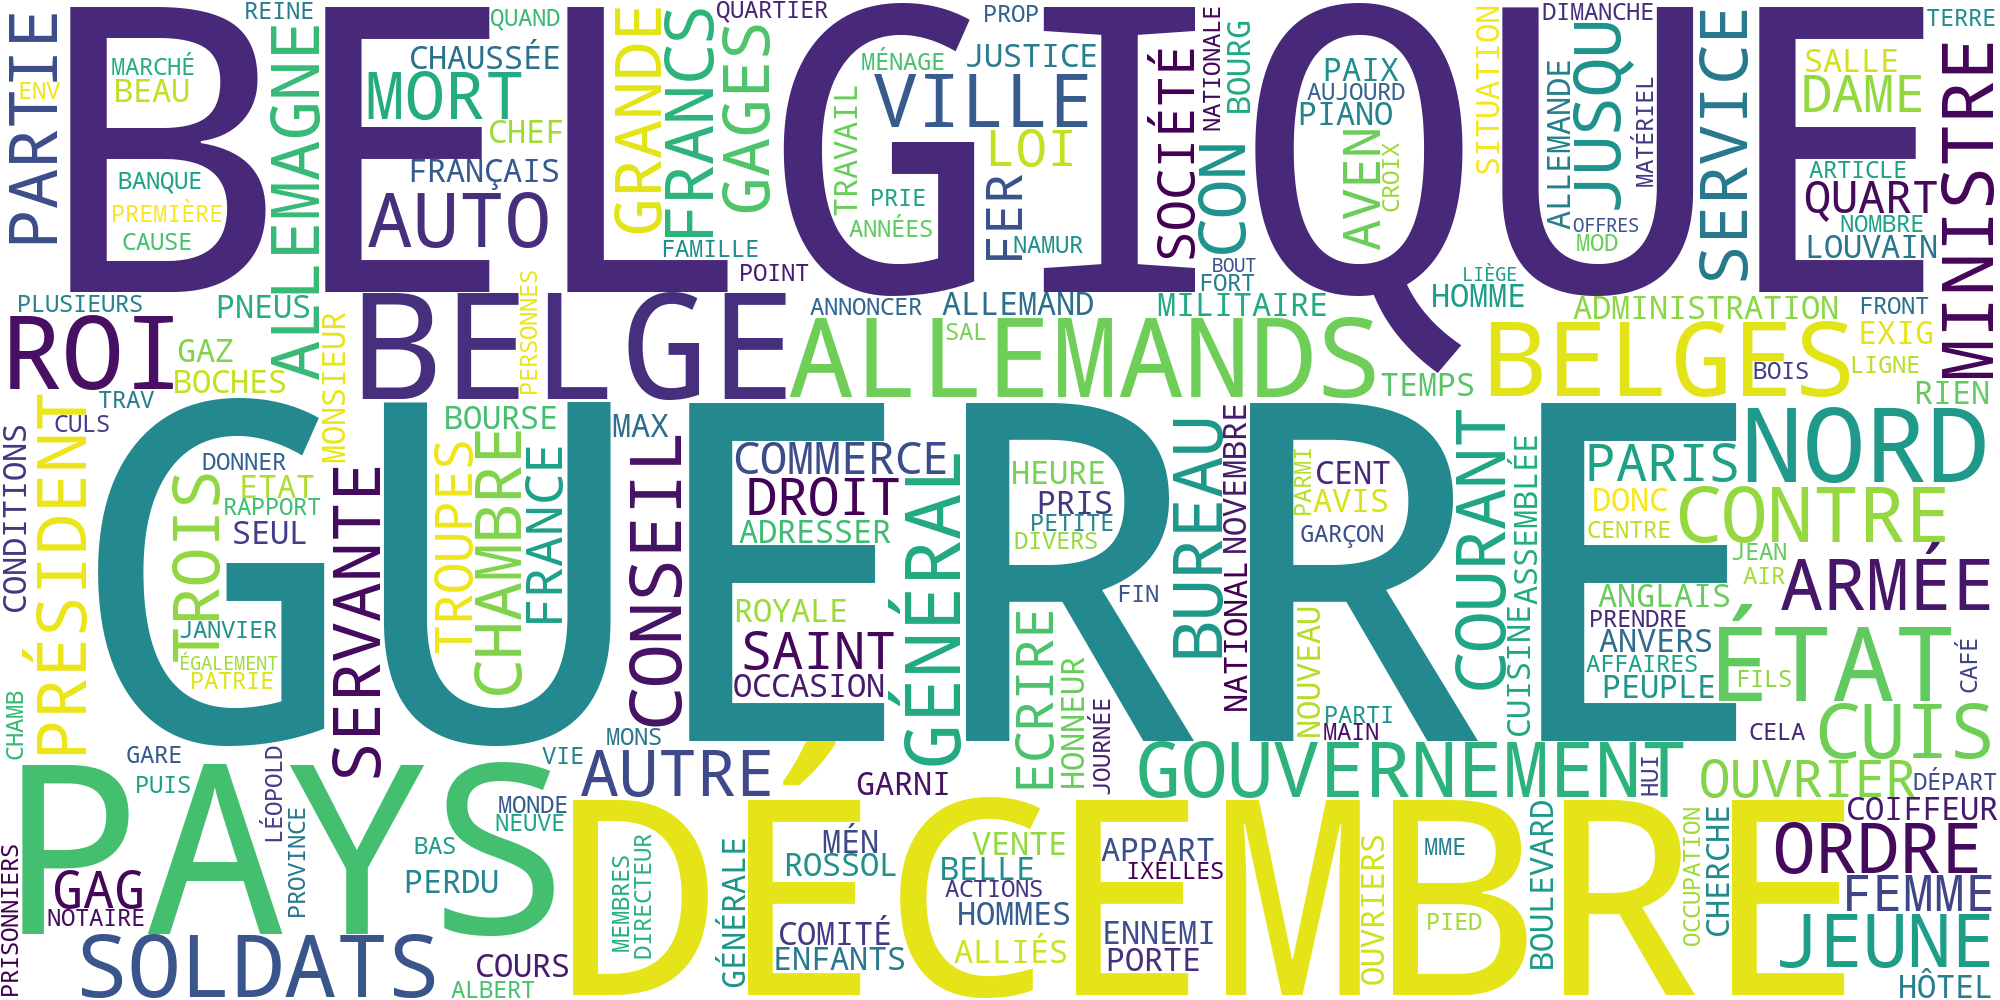

In [17]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

In [18]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
!python -m spacy download fr_core_news_md

     ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
     --------- ----------------------------- 11.0/45.8 MB 57.2 MB/s eta 0:00:01
     -------------------- ------------------ 24.4/45.8 MB 61.7 MB/s eta 0:00:01
     -------------------------------- ------ 38.0/45.8 MB 63.6 MB/s eta 0:00:01
     --------------------------------------  45.6/45.8 MB 63.1 MB/s eta 0:00:01
     ---------------------------------------- 45.8/45.8 MB 54.0 MB/s  0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
nlp = spacy.load('fr_core_news_md')

In [20]:
# Charger le texte
n=1000000
text = open("../../data/tmp/1918.txt", encoding='utf-8').read()[:n]


In [21]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 57.2 s
Wall time: 57.9 s


In [22]:
# Compter les entités
people = defaultdict(int)
orgs = defaultdict(int)
places = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1
    if ent.label_ == "LOC" and len(ent.text) > 3:
        places[ent.text] += 1
    if ent.label_ == "ORG" and len(ent.text) > 3:
        orgs[ent.text] += 1

In [23]:
# Trier et imprimer les personnes 

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Rossel apparait 62 fois dans le corpus
Reine apparait 28 fois dans le corpus
M. Max apparait 18 fois dans le corpus
Fidéicommis apparait 18 fois dans le corpus
Rapp apparait 14 fois dans le corpus
Adolphe Max apparait 13 fois dans le corpus
Louise apparait 12 fois dans le corpus
Albert apparait 11 fois dans le corpus
fairo apparait 10 fois dans le corpus
Mme Contzen apparait 9 fois dans le corpus
Réclames apparait 8 fois dans le corpus
Léopold apparait 8 fois dans le corpus
Messieurs apparait 8 fois dans le corpus
miss Cavell apparait 8 fois dans le corpus
M. Cooreman apparait 7 fois dans le corpus
chamb apparait 7 fois dans le corpus
Léon Delacroix apparait 7 fois dans le corpus
Delacroix apparait 7 fois dans le corpus
g. Rossel apparait 7 fois dans le corpus
culs apparait 7 fois dans le corpus
Agence Rossel apparait 7 fois dans le corpus
trav apparait 7 fois dans le corpus
Lemonnier apparait 6 fois dans le corpus
M. Lemonnier apparait 6 fois dans le corpus
Jacqmain apparait 6 fois da

In [24]:
# Trier et imprimer les lieux

sorted_places = sorted(places.items(), key=lambda kv: kv[1], reverse=True)

for places, freq in sorted_places[:50]:
    print(f"{places} apparait {freq} fois dans le corpus")

Bruxelles apparait 186 fois dans le corpus
Belgique apparait 149 fois dans le corpus
Allemands apparait 102 fois dans le corpus
Allemagne apparait 65 fois dans le corpus
Belges apparait 51 fois dans le corpus
Liège apparait 36 fois dans le corpus
Anvers apparait 33 fois dans le corpus
Etat apparait 32 fois dans le corpus
Hollande apparait 32 fois dans le corpus
Nord apparait 30 fois dans le corpus
Brux apparait 29 fois dans le corpus
Patrie apparait 28 fois dans le corpus
Paris apparait 25 fois dans le corpus
Bruxellois apparait 23 fois dans le corpus
Louvain apparait 23 fois dans le corpus
France apparait 22 fois dans le corpus
Luxembourg apparait 19 fois dans le corpus
Mons apparait 19 fois dans le corpus
Londres apparait 18 fois dans le corpus
Bourse apparait 18 fois dans le corpus
Angleterre apparait 17 fois dans le corpus
Etats-Unis apparait 17 fois dans le corpus
Baucq apparait 17 fois dans le corpus
Midi apparait 16 fois dans le corpus
Allemand apparait 15 fois dans le corpus
Pa

In [25]:
# Trier et imprimer les organisations

sorted_orgs = sorted(orgs.items(), key=lambda kv: kv[1], reverse=True)

for orgs, freq in sorted_orgs[:50]:
    print(f"{orgs} apparait {freq} fois dans le corpus")

Chambre apparait 29 fois dans le corpus
Conseil apparait 27 fois dans le corpus
Compagnie apparait 23 fois dans le corpus
Comité apparait 20 fois dans le corpus
Sénat apparait 18 fois dans le corpus
ON dem apparait 18 fois dans le corpus
Comité National apparait 16 fois dans le corpus
COIFFEUR apparait 14 fois dans le corpus
Justice apparait 11 fois dans le corpus
Boches apparait 11 fois dans le corpus
Société apparait 10 fois dans le corpus
OH DEM apparait 10 fois dans le corpus
Banque apparait 10 fois dans le corpus
Parlement apparait 9 fois dans le corpus
Miss Cavell apparait 7 fois dans le corpus
COIFFEUR dem apparait 7 fois dans le corpus
Sport apparait 6 fois dans le corpus
Constitution apparait 6 fois dans le corpus
Reichstag apparait 6 fois dans le corpus
Chambres apparait 6 fois dans le corpus
ON DEM apparait 6 fois dans le corpus
Limited apparait 6 fois dans le corpus
Université apparait 5 fois dans le corpus
Banque Nationale apparait 5 fois dans le corpus
Applaud apparait 5 

# Sentiment analysis 


In [26]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

### Création d'une fonction `get_sentiment`

In [27]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

### Analyser les sentiments de dix phrases (subjectivité)

In [37]:
get_sentiment("Durant la guerre, la plupart des Etats belligérants ont pris des mesures énergiques, pour restreindre la consommation de l'alcool.")
get_sentiment("Enseveli à jamais, le socialisme national !")
get_sentiment("Le gouvernement procède en ce moment à un recensement; attendons le résultat de son enquête et ne partons pas a l’aveuglette.")
get_sentiment("Nous avons commandé un matériel complet en Amérique.")
get_sentiment("Nous paraîtrons donc Jusqu’à nouvel ordre avec des moyens de fortune.")
get_sentiment("N’oublions pas le sucre, dont nous sommes grands producteurs.")
get_sentiment("Jeudi les troupes américaines ont traversé la ville do Luxembourg")
get_sentiment("Je suis resté le secrétaire des camarades de Belgique, de France et autres pays do l’Entente")
get_sentiment("Un matériel nouveau a été commandé en pays alliés.")
get_sentiment("La séance est ouverte à 2 heures, sous la présidence de M. de Favereau, président.")

This text is 10% negative and perfectly objective.
This text is neutral and perfectly objective.
This text is neutral and perfectly objective.
This text is 36% positive and 50% subjective.
This text is 8% positive and 25% subjective.
This text is 30% positive and 20% subjective.
This text is 8% positive and 10% subjective.
This text is 10% negative and perfectly objective.
This text is 32% positive and 52% subjective.
This text is 31% positive and 10% subjective.


## 2. Utilisation de transformers



In [38]:
%pip install tensorflow
%pip install sentencepiece
%pip install transformers
%pip install tf_keras

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\elhaj\Github\tac\tac_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
 %pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_pt=False)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

sentiment_analyser = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, dtype='float32')

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Device set to use 0


### Analyser les sentiments des 10 phrases (polarité)

In [51]:
sentiment_analyser("Durant la guerre, la plupart des Etats belligérants ont pris des mesures énergiques, pour restreindre la consommation de l'alcool.")

[{'label': 'POSITIVE', 'score': 0.7160588502883911}]

In [42]:
sentiment_analyser("Enseveli à jamais, le socialisme national !")

[{'label': 'NEGATIVE', 'score': 0.840474009513855}]

In [43]:
sentiment_analyser("Le gouvernement procède en ce moment à un recensement; attendons le résultat de son enquête et ne partons pas a l’aveuglette.")

[{'label': 'POSITIVE', 'score': 0.5536511540412903}]

In [44]:
sentiment_analyser("Nous avons commandé un matériel complet en Amérique.")

[{'label': 'NEGATIVE', 'score': 0.6816933155059814}]

In [45]:
sentiment_analyser("Nous paraîtrons donc Jusqu’à nouvel ordre avec des moyens de fortune.")

[{'label': 'NEGATIVE', 'score': 0.6572727560997009}]

In [46]:
sentiment_analyser("N’oublions pas le sucre, dont nous sommes grands producteurs.")

[{'label': 'NEGATIVE', 'score': 0.507922887802124}]

In [47]:
sentiment_analyser("Jeudi les troupes américaines ont traversé la ville do Luxembourg")

[{'label': 'NEGATIVE', 'score': 0.6108411550521851}]

In [48]:
sentiment_analyser("Je suis resté le secrétaire des camarades de Belgique, de France et autres pays do l’Entente")

[{'label': 'POSITIVE', 'score': 0.6708255410194397}]

In [49]:
sentiment_analyser("Un matériel nouveau a été commandé en pays alliés.")

[{'label': 'NEGATIVE', 'score': 0.6543344259262085}]

In [50]:
sentiment_analyser("La séance est ouverte à 2 heures, sous la présidence de M. de Favereau, président.")

[{'label': 'POSITIVE', 'score': 0.5120810270309448}]